In [22]:
from xml.etree import ElementTree
from os import listdir
import numpy as np
from mrcnn.utils import Dataset
from matplotlib import pyplot
import imutils

class TestPiecesCarrierDataset(Dataset):
    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class('dataset', 1, 'test_piece')
        self.add_class('dataset', 2, 'carrier')
        
        images_dir = dataset_dir + '/pos/'
        annotations_dir = dataset_dir + '/annotations/'
        
        for filename in listdir(images_dir):
            image_id = filename[:-4]
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
            
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
            
            
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        print(path)
        boxes, w, h = self.parse_bounding_boxes(path)
        masks = np.zeros([w, h, len(boxes)], dtype='uint8')
        print(boxes[0][0], boxes[0][1], boxes[0][2], boxes[0][3])
        class_ids = []
        print(len(boxes))
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[0], box[2]
            col_s, col_e = box[1], box[3]
            print(row_s, row_e, col_s, col_e)
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('test_piece'))
            class_ids.append(self.class_names.index('carrier'))
        return masks, np.asarray(class_ids, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']
        
    def parse_bounding_boxes(self, src):
        tree = ElementTree.parse(src)
        root = tree.getroot()
        bdboxes = []
        
        for b in root.findall('.//bndbox'):
            xmin = int(b.find('xmin').text)
            ymin = int(b.find('ymin').text)
            xmax = int(b.find('xmax').text)
            ymax = int(b.find('ymax').text)
            xywh = [xmin, ymin, xmax, ymax]
            bdboxes.append(xywh)
        width = int(root.find('.//size/width').text) 
        height = int(root.find('.//size/height').text)
        return bdboxes, width, height


(4000, 3000, 3)
img/annotations/Pos_00.xml
1 133 1433 2098
5
5 50 133 2098
5 50 144 1228
5 50 28 1205
5 50 1 1094
5 50 1 1185
(4000, 3000, 5)
(3000, 4000, 3)


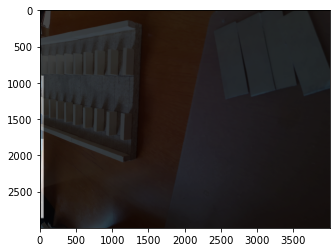

In [23]:
train_set = TestPiecesCarrierDataset()
train_set.load_dataset('img')
train_set.prepare()

image_id = 0
image = train_set.load_image(image_id)
print(image.shape)

masks, class_ids = train_set.load_mask(image_id)
print(masks.shape)

rotated = imutils.rotate_bound(image, 270)
print(rotated.shape)

mask1 = masks[:, :, 0]
mask2 = masks[:, :, 1]

rotated_mask1 = imutils.rotate_bound(mask1, 270)
rotated_mask2 = imutils.rotate_bound(mask2, 270)

pyplot.imshow(rotated)
pyplot.imshow(rotated_mask1, cmap='gray', alpha=0.6)
pyplot.imshow(rotated_mask2, cmap='gray', alpha=0.3)
pyplot.show()